<a href="https://colab.research.google.com/github/Aditya11013/Assignments/blob/main/FOML/Assignment_03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

0.8875


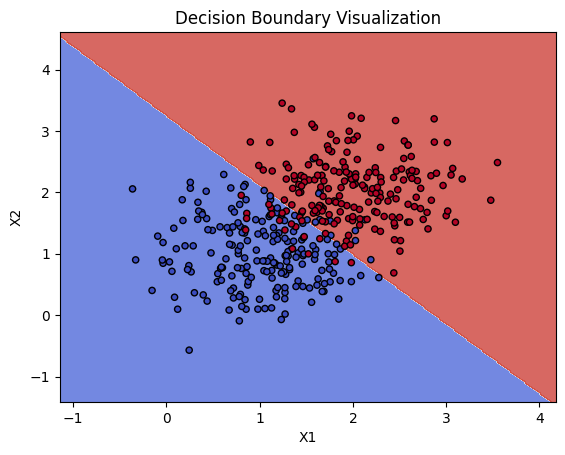

0.0375


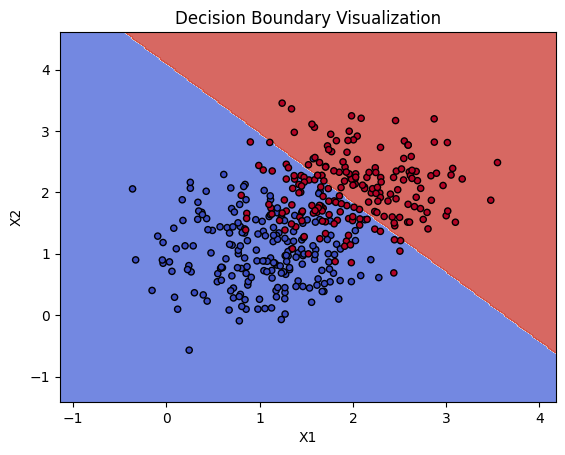

0.9375


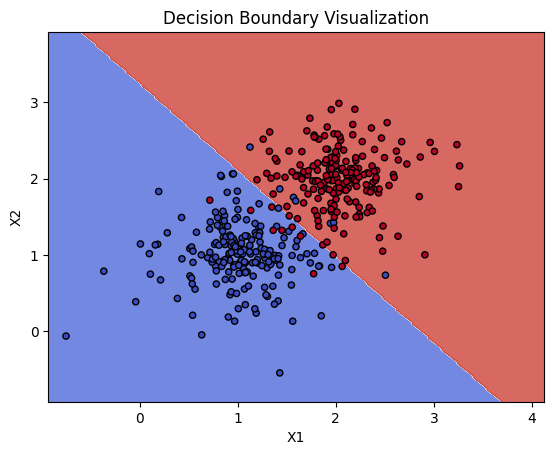

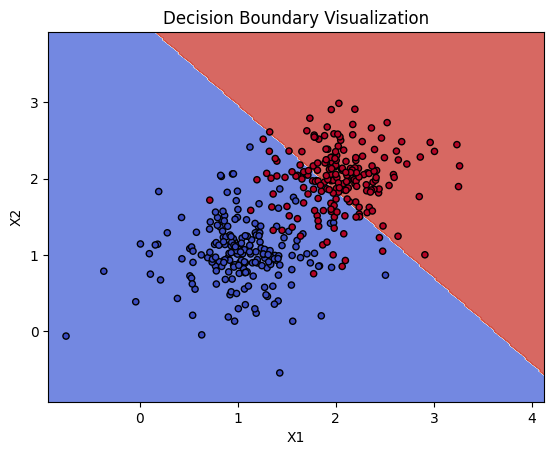

In [ ]:

########################################
#Part-1)-a: Data generation
########################################
np.random.seed(47)
#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =np.random.multivariate_normal(mean1,cov,50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)           #Class2 training data
tr_data =  np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets =np.concatenate((np.zeros(50),np.ones(50)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te =np.random.multivariate_normal(mean1,cov,200)             #Class1 testing data
class2_te =np.random.multivariate_normal(mean2,cov,200)             #Class2 testing data
te_data = np.concatenate((class1_te,class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets =np.concatenate((np.zeros(200),np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    weights=np.dot(np.linalg.pinv(X_train),Y_train)


    #Predict the lables of test data using the pseudo inverse solution
    Y_pred=np.dot(X_test,weights)
    Y_pred_test=np.round(np.dot(X_test,weights))


    #Return the predicted test labels
    return Y_pred_test

#Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

# print(predictions)

##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    accuracy=0
    #Compute the accuracy
    for i in range(len(Y_test)):
        if Y_test[i]==Y_pred[i]:
            accuracy+=1


    #Return the accuracy
    return accuracy/len(Y_pred)

print(LS_Classify_Accuracy(te_targets,predictions))

##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
# Visualization
h = 0.02
x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1
y_min, y_max = tr_data[:, 1].min() - 1, tr_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data.shape[0]), tr_data]), tr_targets)


Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization')
plt.show()





##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
tr_targets =np.concatenate((np.full(50,-1),np.ones(50)))
te_targets =np.concatenate((np.full(200,-1),np.ones(200)))
predictions = LS_Classify(tr_data, tr_targets, te_data)
# print(predictions)
print(LS_Classify_Accuracy(te_targets,predictions))
h = 0.02
x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1
y_min, y_max = tr_data[:, 1].min() - 1, tr_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data.shape[0]), tr_data]), tr_targets)


Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization')
plt.show()


##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################

# Experiment with Laplacian distribution
# Generate data from Laplacian distribution
class1_tr_laplace = np.random.laplace(mean1, 0.3, (50, 2))  # Adjust the scale parameter accordingly
class2_tr_laplace = np.random.laplace(mean2, 0.3, (50, 2))
class1_te_laplace = np.random.laplace(mean1, 0.3, (200, 2))
class2_te_laplace = np.random.laplace(mean2, 0.3, (200, 2))

# Concatenate training and testing data
tr_data_laplace = np.concatenate((class1_tr_laplace, class2_tr_laplace))
te_data_laplace = np.concatenate((class1_te_laplace, class2_te_laplace))
tr_targets_laplace =np.concatenate((np.zeros(50),np.ones(50)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets_laplace =np.concatenate((np.zeros(200),np.ones(200)))
# Calculate weights using pseudo-inverse
weights_laplace = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data_laplace.shape[0]), tr_data_laplace]), tr_targets_laplace)
predictions = LS_Classify(tr_data_laplace, tr_targets_laplace, te_data_laplace)
print(LS_Classify_Accuracy(te_targets_laplace,predictions))

# Print accuracy with Laplacian distribution
# print("Accuracy with Laplacian distribution: {:.2f}%".format(accuracy_laplace * 100))

# Visualize decision boundary


h = 0.02
x_min, x_max = tr_data_laplace[:, 0].min() - 1, tr_data_laplace[:, 0].max() + 1
y_min, y_max = tr_data_laplace[:, 1].min() - 1, tr_data_laplace[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data_laplace.shape[0]), tr_data]), tr_targets_laplace)


Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data_laplace[:, 0], te_data_laplace[:, 1], c=te_targets_laplace, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization')
plt.show()

tr_targets_laplace =np.concatenate((np.full(50,-1),np.ones(50)))
te_targets_laplace =np.concatenate((np.full(200,-1),np.ones(200)))


h = 0.02
x_min, x_max = tr_data_laplace[:, 0].min() - 1, tr_data_laplace[:, 0].max() + 1
y_min, y_max = tr_data_laplace[:, 1].min() - 1, tr_data_laplace[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data_laplace.shape[0]), tr_data]), tr_targets_laplace)


Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data_laplace[:, 0], te_data_laplace[:, 1], c=te_targets_laplace, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization')
plt.show()

<b> Report your observations </b>

1.Accuracy for laplacian is better than that of gaussian

2.The decision boundary is better than for labels {0,1} than for {-1,1}

3.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


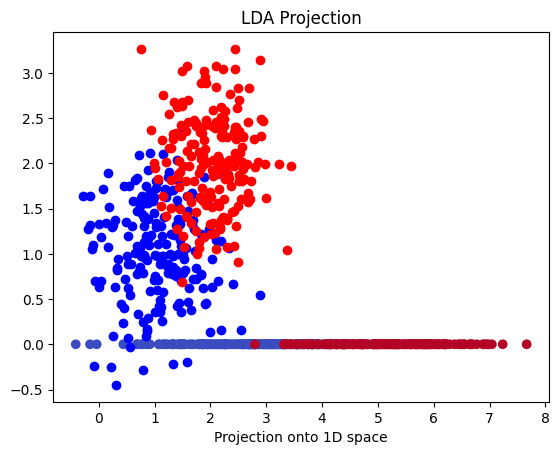

Accuracy with LDA: 88.75
[-0.03682113 -0.0279446 ]


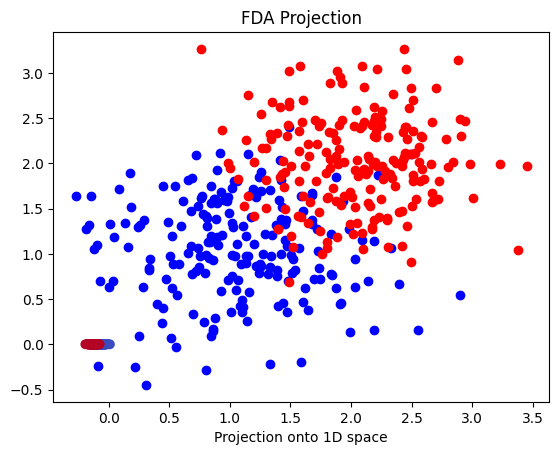

Accuracy with FDA: 89.5


In [ ]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =np.random.multivariate_normal(mean1,cov,50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)           #Class2 training data
tr_data =  np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets =np.concatenate((np.zeros(50),np.ones(50)))            #Class

#Generate testing data.
class1_te =np.random.multivariate_normal(mean1,cov,200)             #Class1 testing data
class2_te =np.random.multivariate_normal(mean2,cov,200)             #Class2 testing data
te_data = np.concatenate((class1_te,class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets =np.concatenate((np.zeros(200),np.ones(200)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.



########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):

  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
    mean1=np.mean(X_train[:50],axis=0)
    mean2=np.mean(X_train[50:-1],axis=0)
    w=mean2-mean1/np.linalg.norm(mean2-mean1)
#     print(mean1)
#     print(mean2)
    S_b=np.dot((mean2-mean1).T,mean2-mean1)
  #Compute the threshold
    threshold=np.dot((mean1+mean2)/2,w)
  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
    Y_test=np.dot(X_test,w)
#     print(Y_test)
    predictions=[]
    for i in range(len(Y_test)):
        if Y_test[i]>threshold:
            predictions.append(1)
        else:
            predictions.append(0)


  #Return weight vector and the predictions on testing data
    return np.array(predictions), w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)


def LDA_project(w, X_test, Y_test):
    #Inputs: weight vector, testing data, and testing labels
    # Project the test data onto 1-dimensional space
    projections = X_test @ w

    # Plot the projections
    plt.scatter(projections, np.zeros_like(projections), c=Y_test, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:200,0],X_test[:200,1],color='blue')
    plt.scatter(X_test[200:,0],X_test[200:,1],color='red')
    plt.xlabel('Projection onto 1D space')
    plt.title('LDA Projection')
    plt.show()

LDA_project(w, te_data, te_targets)
# Compute and print the accuracy
acc=0
for i in range(len(te_targets)):
    if(te_targets[i]==predictions[i]):
        acc+=1
print('Accuracy with LDA:', (acc*100)/len(te_targets))


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  #Compute the weight vector
    mean1=np.mean(X_train[:50],axis=0)
    mean2=np.mean(X_train[50:-1],axis=0)
    s_w=np.array([[0,0],[0,0]])
    for i in range(len(X_train)):
        if(i<len(X_train)/2):
            s_w=np.add(s_w,np.outer((X_train[i]-mean1).T,(X_train[i]-mean1)))
        else:
            s_w=np.add(s_w,np.outer((X_train[i]-mean2).T,(X_train[i]-mean2)))

    w=np.dot(np.linalg.inv(s_w),(mean1-mean2).T)
    print(w)
  #Compute the threshold
    threshold=np.dot((mean1+mean2)/2,w)

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
    Y_test=np.dot(X_test,w)
    predictions=[]
    for i in range(len(Y_test)):
        if Y_test[i]<threshold:
            predictions.append(1)
        else:
            predictions.append(0)

  #Return weight vector and the predictions on testing data

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)

def FDA_project(w, X_test, Y_test):
    pass
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
    projections = X_test @ w
    # Plot the projections
    plt.scatter(projections, np.zeros_like(projections), c=Y_test, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:200,0],X_test[:200,1],color='blue')
    plt.scatter(X_test[200:,0],X_test[200:,1],color='red')
    plt.xlabel('Projection onto 1D space')
    plt.title('FDA Projection')
    plt.show()

  #Plot the projections


FDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc=0
for i in range(len(te_targets)):
    if(te_targets[i]==predictions[i]):
        acc+=1
print('Accuracy with FDA:', (acc*100)/len(te_targets))
# print('Accuracy with FDA:', acc*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix


  #Compute and return the projection matrix
  return w





<b> Report your observations </b>

1.LDA effectively projects the data onto a 1D axis that maximizes the separation between classes.

2.FDA further enhances class separation by considering both between-class and within-class covariance.

3.Accuracy of FDA is better than LDA




<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


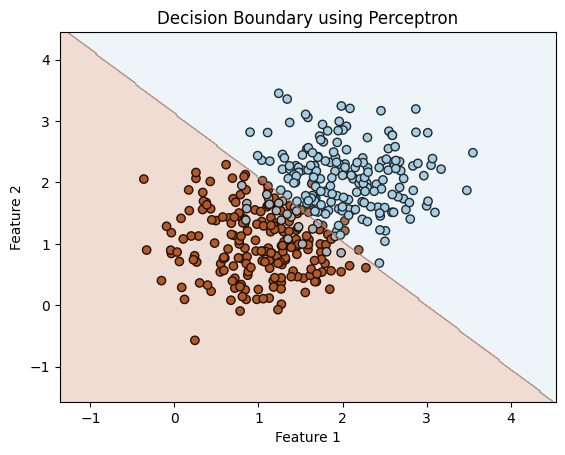

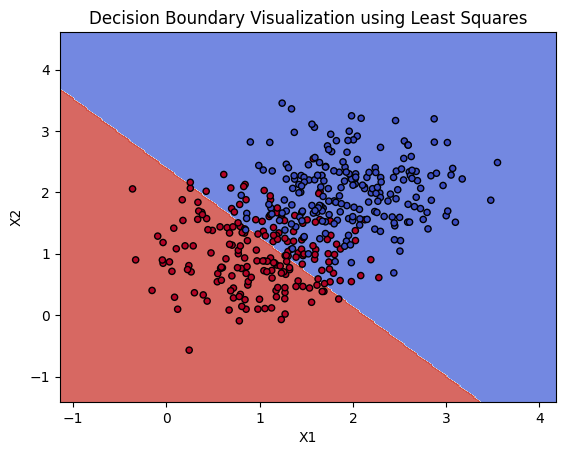

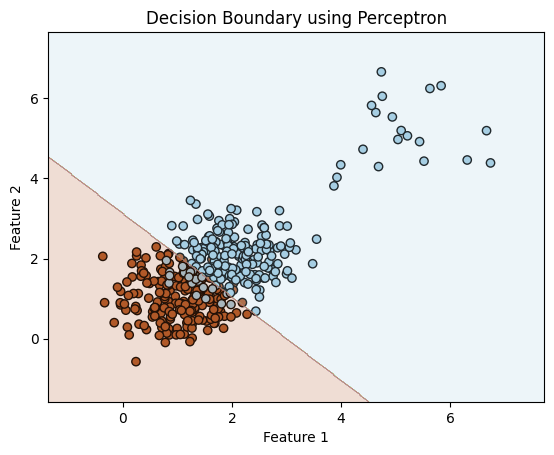

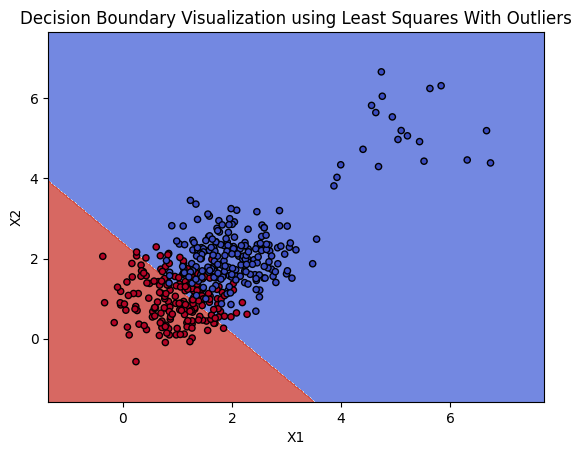

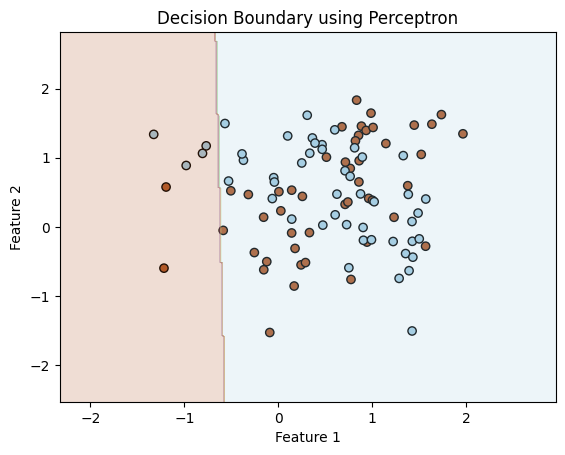

In [ ]:
########################################
#Part-3)-(a): Data generation
########################################
np.random.seed(47)
#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =np.random.multivariate_normal(mean1,cov,50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,50)           #Class2 training data
tr_data =  np.concatenate((class1_tr,class2_tr))             #Combine class1 training and class2 training data to get total training data
tr_targets =np.concatenate((np.ones(50),np.full(50,-1)))            #Class

#Generate testing data.
class1_te =np.random.multivariate_normal(mean1,cov,200)             #Class1 testing data
class2_te =np.random.multivariate_normal(mean2,cov,200)             #Class2 testing data
te_data = np.concatenate((class1_te,class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets =np.concatenate((np.ones(200),np.full(200,-1)))            #Class labels. Assign the value "0" to class1 and the value "1" to class2.




########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs =100     #Number of epochs
    X = np.c_[np.ones((X_train.shape[0], 1)), X_train]        #Data. Append ones to the training data to take care of the bias
    w =np.random.rand(X.shape[1])          #Initialize the weight vector
    eta=1
    for epoch in range(0,epochs,1):
#         print(w)
#         print(epoch)
        #Compute the predictions
        predictions=[]
        for i in range(len(X)):
#             print(np.dot(X[i],w))
            if np.dot(X[i],w)>=0:
                predictions.append(1)
            else:
                predictions.append(-1)


        error=0
        misclassified_X=[]
        misclassified_Y=[]
#         print(Y_train)
        for i in range(len(Y_train)):
            if predictions[i]!=Y_train[i]:
                error-=predictions[i]*Y_train[i]
                misclassified_X.append(X[i])
                misclassified_Y.append(Y_train[i])



        #Compute the error


        #Update the weight vector
        for i in range(len(misclassified_X)):
            w+= misclassified_X[i] * misclassified_Y[i]
    #Compute the test data predicitions using the final weight vector
    X = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    predictions=[]
    for i in range(len(X)):
        if np.dot(X[i],w)>=0:
            predictions.append(1)
        else:
            predictions.append(-1)


    #Return the test data predictions and the final weight vector
    return np.array(predictions), w


##########################################
#Plot the decision boundary using perceptron
##########################################
predictions,w=Perceptron(tr_data,tr_targets,te_data)

##########################################
# Plot the decision boundary using perceptron
##########################################
def plot_decision_boundary(X, y, w):
    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='black')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                            np.arange(x2_min, x2_max, 0.02))
    Z = np.dot(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()], w)
    Z = np.where(Z > 0, 1, -1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary using Perceptron')
    plt.show()

# Plot decision boundary using perceptron
plot_decision_boundary(te_data, te_targets, w)


##########################################
#Plot the decision boundary using least squares
##########################################
predictions = LS_Classify(tr_data, tr_targets, te_data)
h = 0.02
x_min, x_max = tr_data[:, 0].min() - 1, tr_data[:, 0].max() + 1
y_min, y_max = tr_data[:, 1].min() - 1, tr_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data.shape[0]), tr_data]), tr_targets)

Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization using Least Squares')
plt.show()



##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

# Set the parameters for the outlier distribution
outlier_mean = [5, 5]  # Mean of the outlier distribution
outlier_cov = [[0.5, 0], [0, 0.5]]  # Covariance matrix for the outliers
outlier_count = 20  # Number of outlier data points to generate

# Generate outliers for class 1 testing data
outliers_class1 = np.random.multivariate_normal(outlier_mean, outlier_cov, outlier_count)

# Concatenate outliers with class 1 testing data
class1_te_with_outliers = np.concatenate((class1_te, outliers_class1))

# Update the testing targets accordingly
# te_targets_class1_with_outliers = np.concatenate((te_targets[:200], np.full(outlier_count, -1)))

# Now, you can use class1_te_with_outliers and te_targets_class1_with_outliers for classification.
# Repeat the same process for class 2 if needed.
te_data_outliers = np.concatenate((class1_te_with_outliers,class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets_outliers =np.concatenate((np.ones(200),np.full(220,-1)))

plot_decision_boundary(te_data_outliers, te_targets_outliers, w)


predictions = LS_Classify(tr_data, tr_targets, te_data_outliers)
h = 0.02
x_min, x_max = te_data_outliers[:, 0].min() - 1, te_data_outliers[:, 0].max() + 1
y_min, y_max = te_data_outliers[:, 1].min() - 1, te_data_outliers[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Compute weights
weights = np.dot(np.linalg.pinv(np.c_[np.ones(tr_data.shape[0]), tr_data]), tr_targets)

Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)
Z = np.where(Z > 0.5, 1, 0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(te_data_outliers[:, 0], te_data_outliers[:, 1], c=te_targets_outliers, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Visualization using Least Squares With Outliers')
plt.show()


##########################################
#Part-3)-(d): Data generation XOR
##########################################

# #Set the parameters of Gaussian distribution
class1_mean1 =[0,0]      #Mean of Gaussian1
class1_mean2 =[1,1]      #Mean of Gaussian3
class2_mean1 =[1,0]     #Mean of Gaussian2
class2_mean2 =[0,1]      #Mean of Gaussian4
cov =[[0.3,0],[0,0.3]]   #Covariance matrix. Same covariance for class1 and class2

# #Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 =np.random.multivariate_normal(class1_mean1,cov,60)
class1_data2 =np.random.multivariate_normal(class1_mean2,cov,60)
class2_data1 =np.random.multivariate_normal(class2_mean1,cov,60)
class2_data2 =np.random.multivariate_normal(class2_mean2,cov,60)

#Obtain 2-class dataset
X_1 = (np.concatenate([class1_data1, class1_data2]))
np.random.shuffle(X_1)
Y_1 = [1] * len(X_1)
X_2 = (np.concatenate([class2_data1, class2_data2]))
np.random.shuffle(X_2)
Y_2 = [-1] * len(X_2)
n = int(0.6 * len(X_1))
#Create train test splits
X_train=np.concatenate([X_1[:n],X_2[:n]])
Y_train=np.concatenate([Y_1[:n],Y_2[:n]])
X_test=np.concatenate([X_1[n:],X_2[n:]])
Y_test=np.concatenate([Y_1[n:],Y_2[n:]])
#Classify this dataset using perceptron algorithm
predictions,w=Perceptron(X_train,Y_train,X_test)



#Plot the decision boundary

plot_decision_boundary(X_test, Y_test, w)




<b> Report your observations </b>

1.Decision boundary is more accurate predicted using perceptron than by least squares approach

2.Perceptron fails in the XOR case as it is not able to classify

3.Even in the outliers peceptron is better than least squares approach



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




0.5 0.5
Decision Boundary Case 1: [ 0.2987528  -0.08926107 -0.10806647]


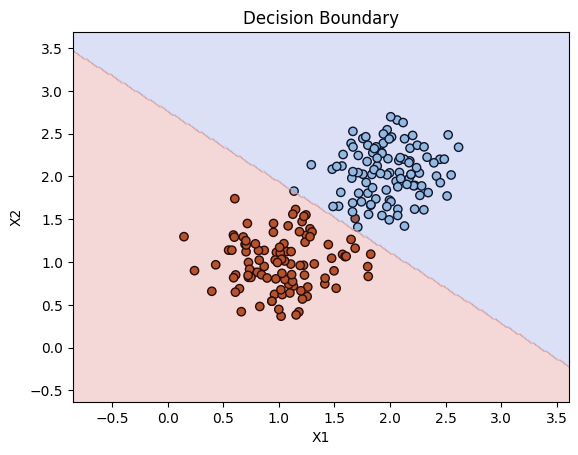

0.25 0.75
Decision Boundary Case 2: [-0.81944998 -0.08360346 -0.10065271]


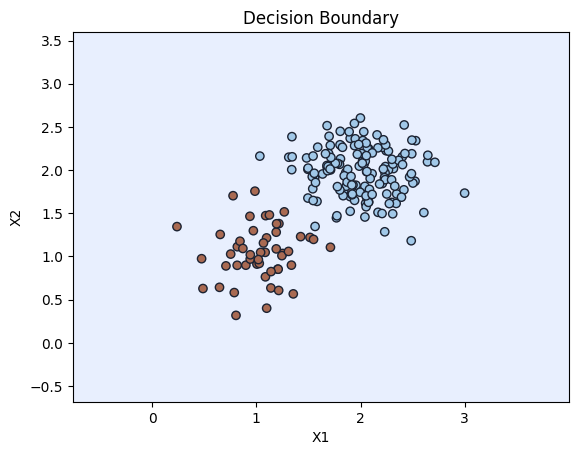

0.75 0.25
Decision Boundary Case 3: [ 1.37687385 -0.0914889  -0.09373541]


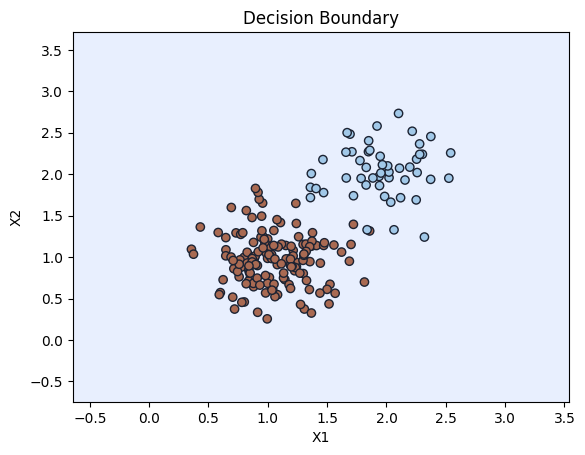

In [ ]:
##########################################
#Part-4a)-0: Data Generation
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    s=np.sum(Y_train>0)
    n=len(Y_train)
    p_c1 =s/n
    p_c2 = 1. - p_c1
    m=int(p_c1*n)
    print(p_c1,p_c2)

    mean_1 =np.mean(X_train[:m],axis=0)
    mean_2 =np.mean(X_train[m:],axis=0)

    cov1=np.array([[0,0],[0,0]])
    for i in range(m):
        cov1=np.add(cov1,np.outer((X_train[i]-mean_1).T,(X_train[i]-mean_1)))

    cov2=np.array([[0,0],[0,0]])
    for i in range(m,len(X_train)):
        cov2=np.add(cov2,np.outer((X_train[i]-mean_2).T,(X_train[i]-mean_2)))
    cov =p_c1*cov1+p_c2*cov2

    w =np.dot(np.linalg.inv(cov),mean_1-mean_2)
    w0 =-0.5 * np.dot(mean_1.T,np.dot(np.linalg.inv(cov),(mean_1))) + 0.5 * np.dot(mean_2.T,np.dot(np.linalg.inv(cov),(mean_2))) + np.log(p_c1/p_c2)

    return np.array([w0]+list(w))

m1 =[1,1]
m2 =[4,1]
cov =[[0.1,0.0],[0.0,0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov,100)
X_2=np.random.multivariate_normal(mean2,cov,100)
X_train1=np.concatenate([X_1,X_2])
Y_train1=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])
#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov,50)
X_2=np.random.multivariate_normal(mean2,cov,150)
X_train2=np.concatenate([X_1,X_2])
Y_train2=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov,150)
X_2=np.random.multivariate_normal(mean2,cov,50)
X_train3=np.concatenate([X_1,X_2])
Y_train3=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])

##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################


#Plot the decision regions
def plot_decision_boundary(X, Y, w):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w)
    Z = np.where(Z > 0, 1, -1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

boundary_case1 = decisionBoundary(X_train1, Y_train1)
print("Decision Boundary Case 1:", boundary_case1)
plot_decision_boundary(X_train1, Y_train1, boundary_case1)
boundary_case2 = decisionBoundary(X_train2, Y_train2)
print("Decision Boundary Case 2:", boundary_case2)
plot_decision_boundary(X_train2, Y_train2, boundary_case2)
boundary_case3 = decisionBoundary(X_train3, Y_train3)
print("Decision Boundary Case 3:", boundary_case3)
plot_decision_boundary(X_train3, Y_train3, boundary_case3)


100
0.5 0.5
Decision Boundary Case 1: [ 0.28691611 -0.07445389 -0.11498822]


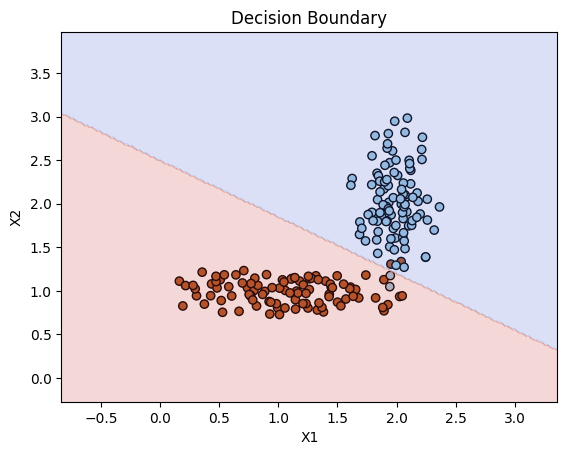

50
0.25 0.75
Decision Boundary Case 2: [-0.73733594 -0.19510391 -0.04316851]


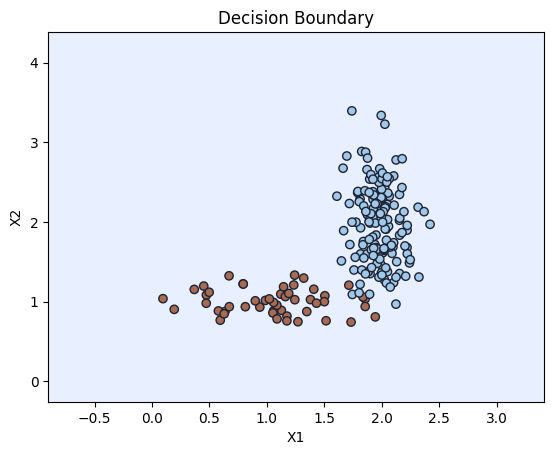

150
0.75 0.25
Decision Boundary Case 3: [ 1.45242809 -0.04493964 -0.19540407]


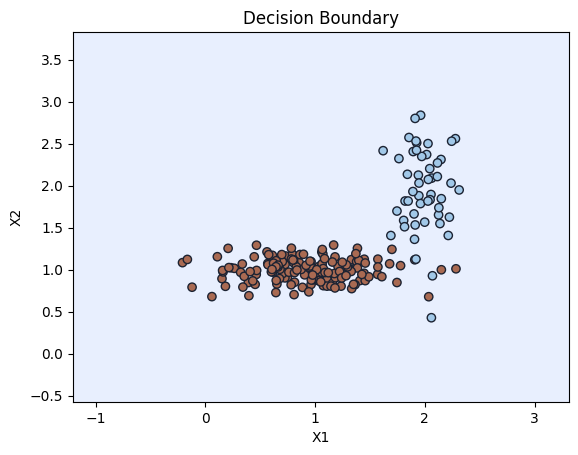

In [ ]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 =[1,1]
m2 =[3,1]
cov1 =[[0.2,0.0],[0.0,0.02]]
cov2 =[[0.02,0.0],[0.0,0.2]]
#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov1,100)
X_2=np.random.multivariate_normal(mean2,cov2,100)
X_train1=np.concatenate([X_1,X_2])
Y_train1=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])
#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov1,50)
X_2=np.random.multivariate_normal(mean2,cov2,150)
X_train2=np.concatenate([X_1,X_2])
Y_train2=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X_1=np.random.multivariate_normal(mean1,cov1,150)
X_2=np.random.multivariate_normal(mean2,cov2,50)
X_train3=np.concatenate([X_1,X_2])
Y_train3=np.concatenate([[1]*len(X_1),[-1]*len(X_2)])


##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
# def decisionBoundary(X_train, Y_train, X_test):
#     #Inputs: Training data and Training labels
#     #Outputs: Decision boundary parameters, i.e., w0, w
#     p_c1 =
#     p_c2 = 1. - p_c1

#     mean_1 =
#     mean_2 =

#     cov1 =
#     cov2 =

#     #Compute predictions on test data

#     return predictions

#Plot the decision regions
def plot_decision_boundary(X, Y, w):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], w)
    Z = np.where(Z > 0, 1, -1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

boundary_case1 = decisionBoundary(X_train1, Y_train1)
print("Decision Boundary Case 1:", boundary_case1)
plot_decision_boundary(X_train1, Y_train1, boundary_case1)
boundary_case2 = decisionBoundary(X_train2, Y_train2)
print("Decision Boundary Case 2:", boundary_case2)
plot_decision_boundary(X_train2, Y_train2, boundary_case2)
boundary_case3 = decisionBoundary(X_train3, Y_train3)
print("Decision Boundary Case 3:", boundary_case3)
plot_decision_boundary(X_train3, Y_train3, boundary_case3)






<b> Report your observations </b>

1.

2.

3.



<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations


In [ ]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 =            #Mean of class1
mean2 =            #Mean of class2
cov =  #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr =             #Class1 training data
class2_tr =             #Class2 training data
tr_data =               #Combine class1 training and class2 training data to get total training data
tr_targets =            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class2_te =             #Class1 testing data
class2_te =             #Class2 testing data
te_data =               #Combine class1 testing and class2 testing data to get total testing data
te_targets =            #Class labels. Assign the value "0" to class1 and the value "1" to class2.


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter =  #max number of ierations for parameter update
  threshold = #threshold for classification
  X =          #Data. Append ones to the training data to take care of the bias
  w =          #Initialize the weight vector
  for iter in range(0,max_iter,1):
    preds =    #Predictions on X. Sigmoid(w^T.x)
    error =    #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate


    #Update the weight vector


  #Test data predictions



  #Compare the predictions with 0, to output the decision



  #Return the predicted test labels
  return test_preds


Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy

  #Compute and return the accuracy
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################








##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################











<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions



    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 =    #Mean vector of component1 in GMM
sig1 =   #Full covariance matrix of component1 in GMM
mu2 =    #Mean vector of component2 in GMM
sig2 =   #Full covariance matrix of component2 in GMM
pi =     #Prior probabilities

n_points =  #Number of points

# Spherical covariances
sig1_s =
sig2_s =
# Diagonal covariances
sig1_d =
sig2_d =

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].set_title('Full Covariance')

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].set_title('Spherical Covariance')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].set_title('Diagonal Covariance')

plt.show()


In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood





############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  gamma =
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      numerator =
      denominator =
      gamma[n,k] = numerator/denominator
  return gamma



############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model

  #Update mu


  #Update sigma


  #Update pi



  #Return the parameters of GMM model
  return pi, mu, sigma


#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):


  plt.show()



############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data =     #data to run EM-algorithm
labels =   #labels
N =        #number of input examples
D =        #data dimension
M =        #no.of components in GMM

pi =       #Initialize the prior probabilities
mu =       #Initialize the mean vectors
sigma =    #Initialize the covariance matrices


nsteps =   #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)





In [ ]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################









<b> Report your observations </b>

1.

2.

3.

